In [ ]:
!pip install ortools

In [8]:
import matplotlib.pyplot as plt
def draw_sudoku(board):
    fig, ax = plt.subplots()

    for i in range(9):
        for j in range(9):
            ax.text(j+0.5, 8.5-i,int(board[i][j]), ha='center', va='center', fontsize=14)

    ax.set_xlim(0, 9)
    ax.set_ylim(0, 9)

    ax.vlines([3, 6], 0, 9, lw=3)
    ax.hlines([3, 6], 0, 9, lw=3)
    ax.vlines([1,2,4,5,7,8], 0, 9, lw=1)
    ax.hlines([1,2,4,5,7,8], 0, 9, lw=1)

    ax.axis('off')
    plt.show()

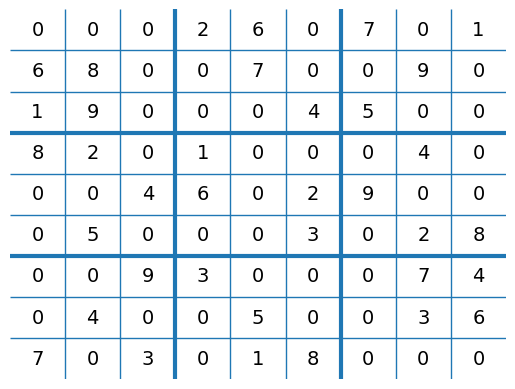

In [5]:
from ortools.sat.python import cp_model
import numpy as np

sudoku = np.array(
    [[0, 0, 0, 2, 6, 0, 7, 0, 1],
    [6, 8, 0, 0, 7, 0, 0, 9, 0],
    [1, 9, 0, 0, 0, 4, 5, 0, 0],
    [8, 2, 0, 1, 0, 0, 0, 4, 0],
    [0, 0, 4, 6, 0, 2, 9, 0, 0],
    [0, 5, 0, 0, 0, 3, 0, 2, 8],
    [0, 0, 9, 3, 0, 0, 0, 7, 4],
    [0, 4, 0, 0, 5, 0, 0, 3, 6],
    [7, 0, 3, 0, 1, 8, 0, 0, 0]])

draw_sudoku(sudoku)

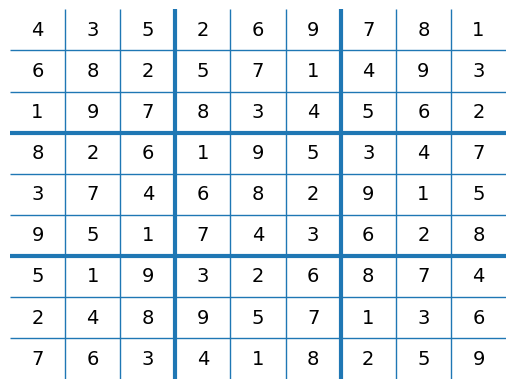

In [9]:
model = cp_model.CpModel()

#Creacion de las variables y sus dominios
board = {}
for i in range(9):
    for j in range(9):
        if sudoku[i][j] == 0:
            board[(i, j)] = model.NewIntVar(1, 9, f'cell_{i}_{j}')
        else:
            board[(i, j)] = sudoku[i][j]

#Restricción de las columnas y las filas
for i in range(9):
    model.AddAllDifferent([board[(i, j)] for j in range(9)])
    model.AddAllDifferent([board[(j, i)] for j in range(9)])

#Restriccion de las cuadros de 3x3
for k in range(3):
    for l in range(3):
        subgrid_vars = []
        for i in range(3):
            for j in range(3):
                subgrid_vars.append(board[(3*k+i, 3*l+j)])
        model.AddAllDifferent(subgrid_vars)

solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.FEASIBLE or status ==cp_model.OPTIMAL:
    sudoku_solved = np.zeros((9, 9))
    for i in range(9):
        for j in range(9):
            sudoku_solved[i][j]=solver.Value(board[(i, j)])
    draw_sudoku(sudoku_solved)
else:
    print('No se encontró solución')